# Network Models: Small World

useful link:
http://www.scholarpedia.org/article/Small-world_network

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.xkcd()
import networkx as nx
%matplotlib inline
import numpy.random as rnd
import random
import operator

During this seminar we will work with **Watts and Strogatz model**.
Again, the idea of the model:

1. Start with regular lattice with N nodes, K nearest neighbours
2. For each node take every edge and rewire it with probability $p$, assuming that there is no loops and edge duplications

##### Task

 1. Implement *rewind(G, p)* function that takes graph G and probability p as input. The function should produce a graph after step 2 of the model above. 
 2. Run experiments for various values of p, compute and show 
     * average path length 
     * clustering coefficients (transitivity) 
     * degree distribution     
 3. Compute centrality metrics for the [network](http://www-personal.umich.edu/~mejn/netdata/polblogs.zip) (including eigenvector, Katz, dispersion, local load centralities) and highlight interaction between vertices with the highest degree. Plot the interesting cases and interpret them.
 4. Try to model the network from (3) with Small World Model and Erdos-Renyi Model.
 5. Plot the dependencies between different centrality metrics for the network and the simultaed graphs. Are there any correlations between centrality metrics? Explain the differences.

In [2]:
def gen_regular_graph(n, k):
    G = nx.Graph()
    nodes = list(range(n))
    for j in range(1, k // 2+1):
        targets = nodes[j:] + nodes[0:j] # first j nodes are now last in list
        G.add_edges_from(zip(nodes,targets))
    return G

def degree_distr(k, bins = 100):
    yh, binEdges = np.histogram(k, bins)
    bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
    return yh, bincenters

### 1) Implement *rewind(G, p)* function that takes graph G and probability p as input. The function should produce a graph after step 2 of the model above. 

In [3]:
def rewind(G, p):
    #list of nodes
    Vert = list(G.nodes())
    #output graph
    GGG = nx.Graph()
    
    for i in G.edges():
        if rnd.random() <= p:
            #suitable nodes list
            Vert.remove(i[0])
            Vert.remove(i[1])
            
            #add edge
            node = random.choice(Vert)
            GGG.add_edge(random.choice(i),node)
            
            #repair nodes list
            Vert.append(i[0])
            Vert.append(i[1]) 
        else:
            #add edge
            GGG.add_edge(i[0],i[1])    
    return GGG

#nx.watts_strogatz_graph can be used

### 2) Run experiments for various values of p, compute and show 
     * average path length 
     * clustering coefficients (transitivity) 
     * degree distribution 
     * GCC sizes

Consider two cases:

    1)k = 7;
    2)k = 3;
    
As k = 7:

In [38]:
#sample
G_initial = gen_regular_graph(100, 7)
p_sample = np.arange(0,1.2,0.2)
N_p = 10

G_sample = []
for p in p_sample:
    G_sample.append(rewind(G_initial, p))


p = 0.0
GCC size: 300
average path length: 8.75757575758
clustering coefficients: 0.6


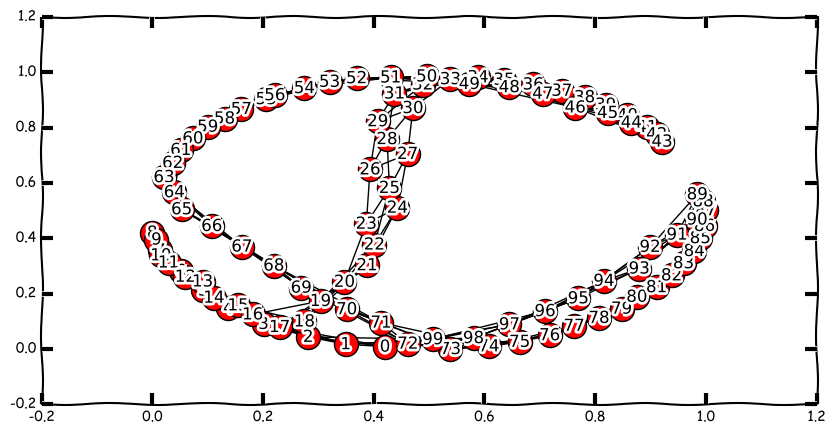


p = 0.2
GCC size: 299
average path length: 3.09131313131
clustering coefficients: 0.279974076474


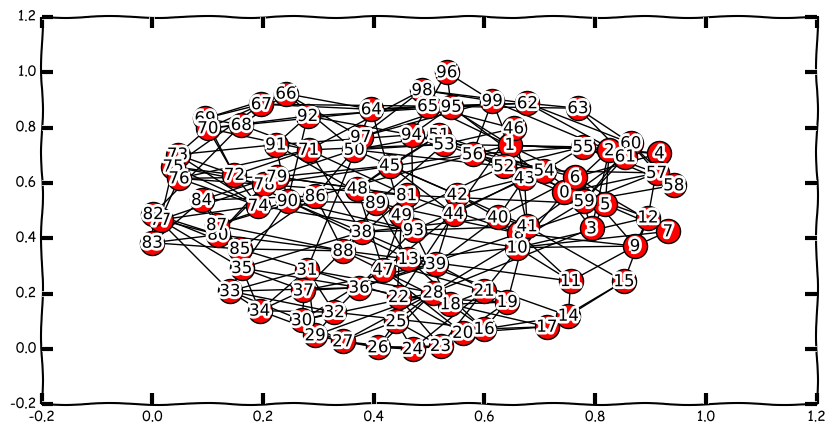


p = 0.4
GCC size: 294
average path length: 2.93252525253
clustering coefficients: 0.176129032258


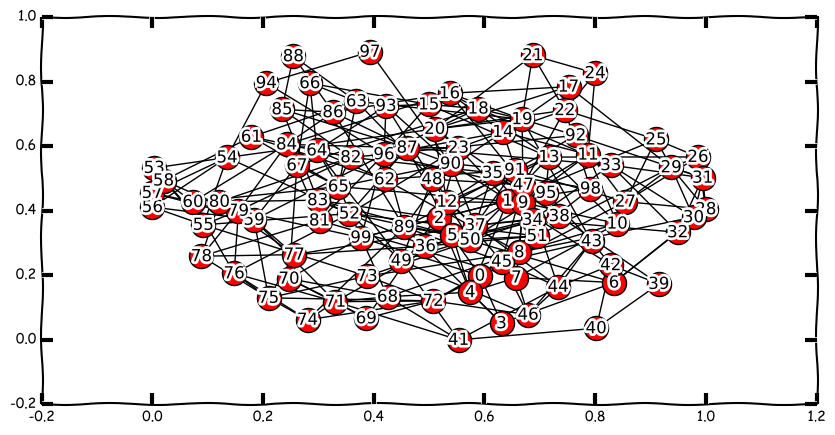


p = 0.6
GCC size: 289
average path length: 2.8103030303
clustering coefficients: 0.0831134564644


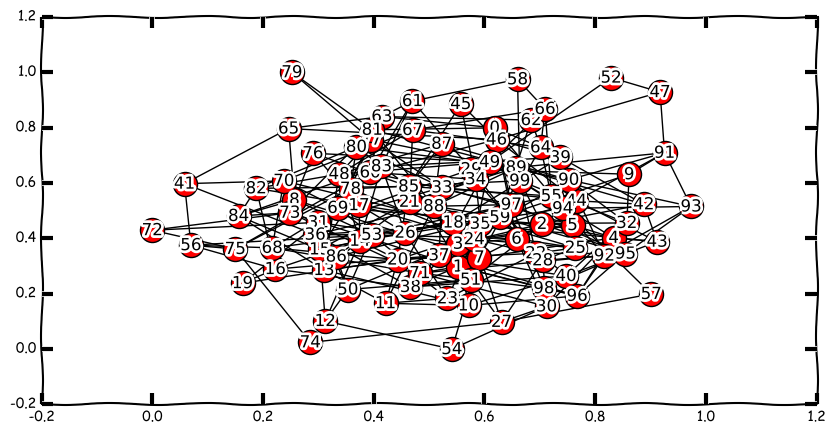


p = 0.8
GCC size: 296
average path length: 2.75858585859
clustering coefficients: 0.0423832923833


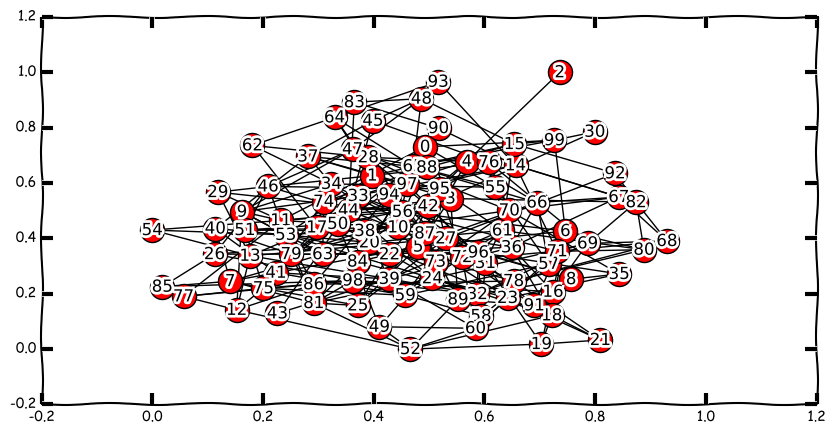


p = 1.0
GCC size: 290
average path length: 2.80181818182
clustering coefficients: 0.0494296577947


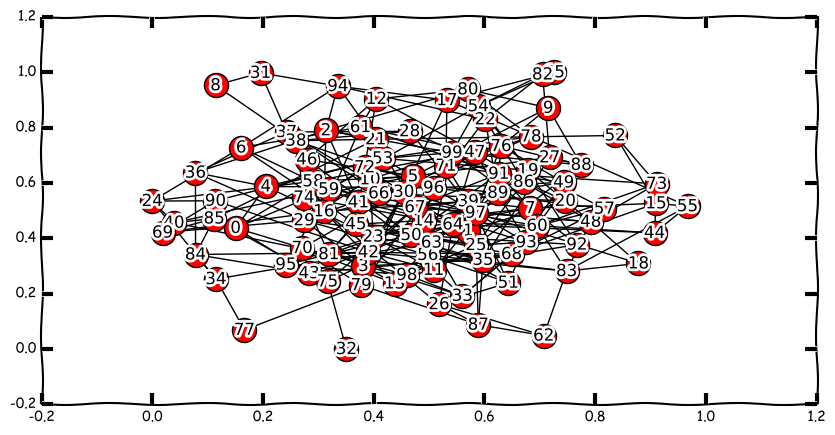

In [39]:
for i in xrange(len(p_sample)):
    G = G_sample[i]
    p = p_sample[i]
    print '\n','p =', p
    
    #GCC size
    G_CC = list(nx.connected_component_subgraphs(G))
    G_GCC = max(G_CC, key=len)
    print 'GCC size:',G_GCC.size()
    
    print 'average path length:', nx.average_shortest_path_length(G_GCC)
    
    print 'clustering coefficients:', nx.transitivity(G)
    
    #plot graphs
    plt.figure(1, figsize=(10, 5))
    pos = nx.spring_layout(G)
    nx.draw_networkx(G, pos)
    plt.show()


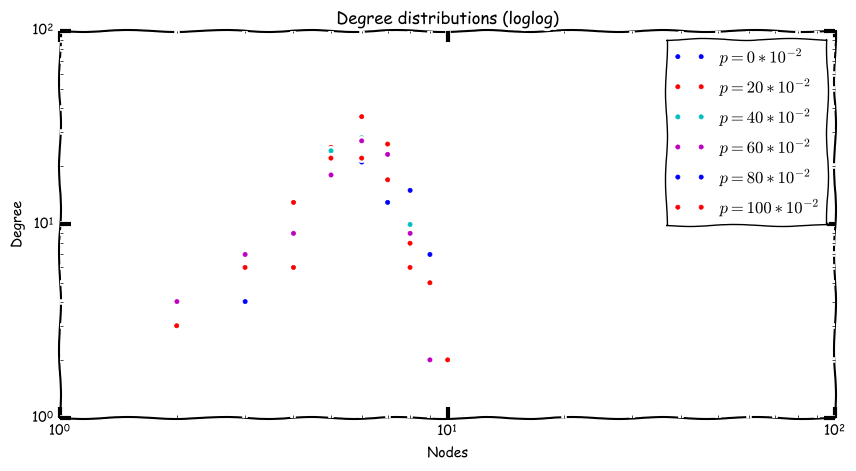

In [40]:
# Plot histograms of degree distributions
plt.figure(1, figsize=(10, 5))
ax = plt.subplot(111)

for i in xrange(len(p_sample)):
    j = p_sample[i]*100
    yh, binEdges=np.histogram(G_sample[i].degree().values(), bins=2000)
    bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
    ax.loglog(bincenters, yh, '.',label='$p = %i * 10^{-2}$' % j)

ax.legend()
plt.ylabel('Degree')
plt.xlabel('Nodes')
plt.title('Degree distributions (loglog)')
plt.show()

Degree distribution looks like Poisson distribution.

As k = 3:

In [41]:
#sample
G_initial = gen_regular_graph(100, 3)
p_sample = np.arange(0,1.2,0.2)

G_sample = []
for p in p_sample:
    G_sample.append(rewind(G_initial, p))


p = 0.0
GCC size: 100
average path length: 25.2525252525
clustering coefficients: 0.0


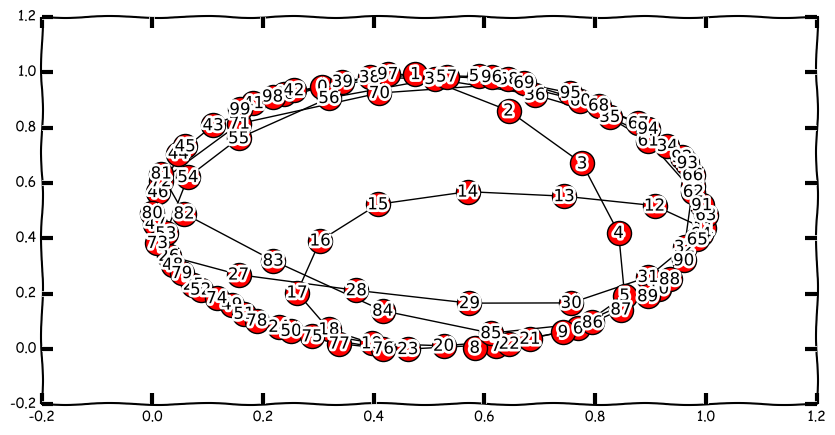


p = 0.2
GCC size: 91
average path length: 12.7890704801
clustering coefficients: 0.0


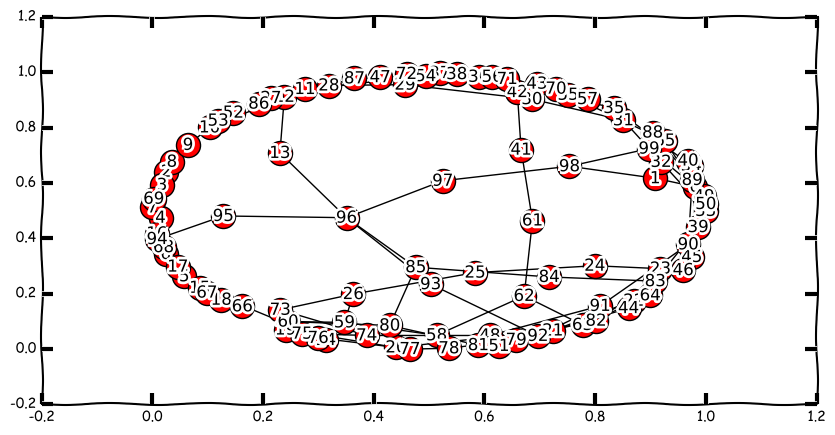


p = 0.4
GCC size: 97
average path length: 11.9922214596
clustering coefficients: 0.0


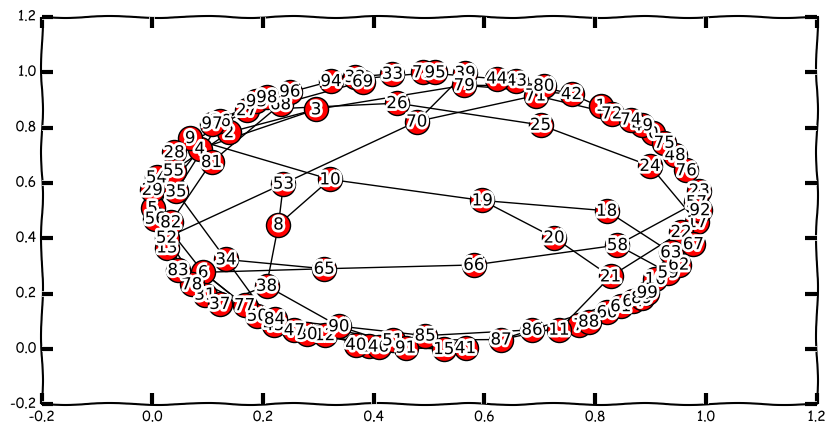


p = 0.6
GCC size: 94
average path length: 8.29384404925
clustering coefficients: 0.0392156862745


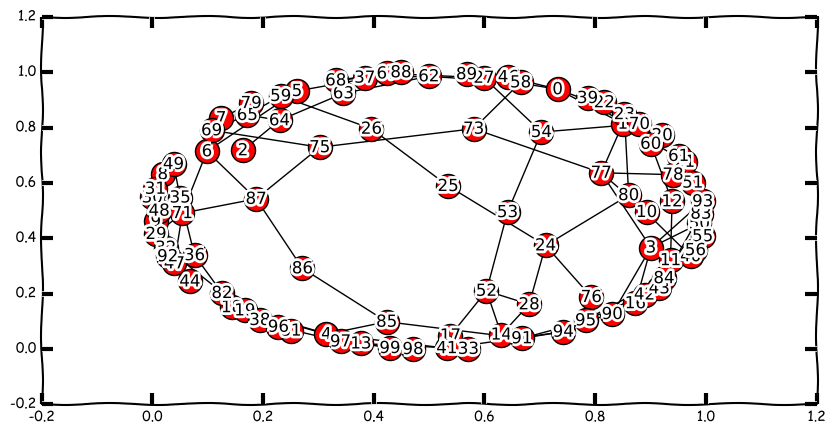


p = 0.8
GCC size: 96
average path length: 6.61586867305
clustering coefficients: 0.0


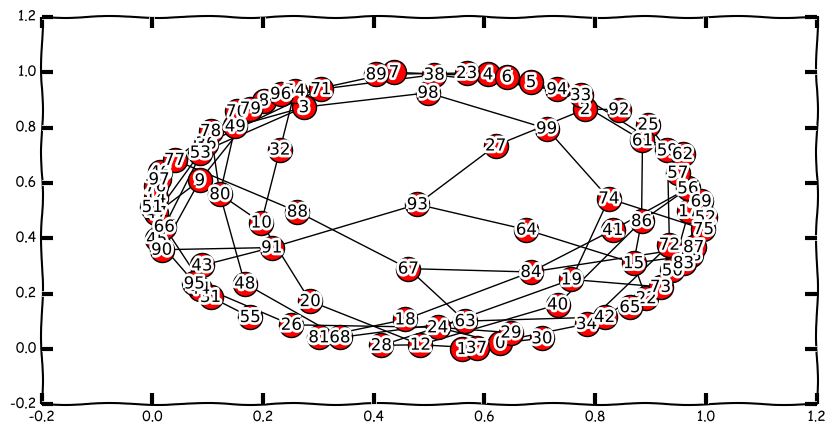


p = 1.0
GCC size: 90
average path length: 5.76023976024
clustering coefficients: 0.0


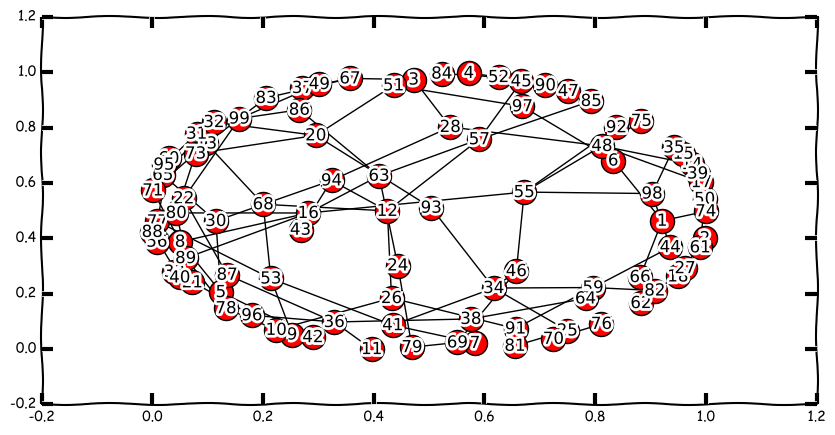

In [42]:
for i in xrange(len(p_sample)):
    G = G_sample[i]
    p = p_sample[i]
    print '\n','p =', p
    
    #GCC size
    G_CC = list(nx.connected_component_subgraphs(G))
    G_GCC = max(G_CC, key=len)
    print 'GCC size:',G_GCC.size()
    
    print 'average path length:', nx.average_shortest_path_length(G_GCC)
    
    print 'clustering coefficients:', nx.transitivity(G)
    
    #plot graphs
    plt.figure(1, figsize=(10, 5))
    pos = nx.spring_layout(G)
    nx.draw_networkx(G, pos)
    plt.show()    
    


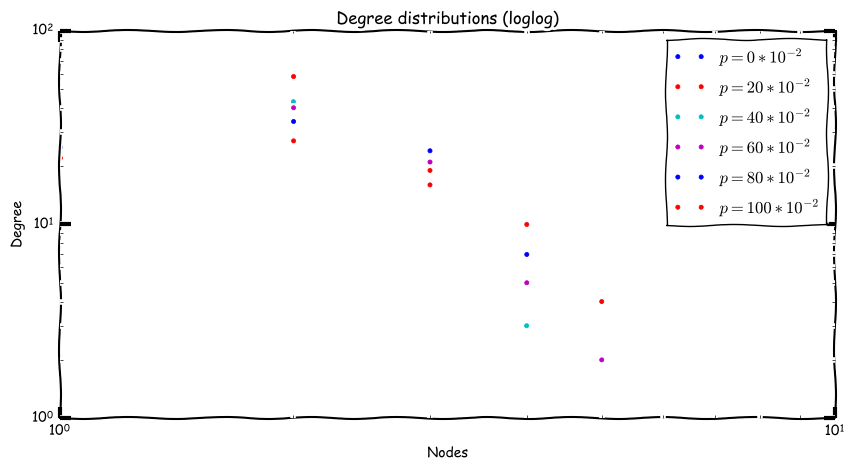

In [43]:
# Plot histograms of degree distributions
plt.figure(1, figsize=(10, 5))
ax = plt.subplot(111)

for i in xrange(len(p_sample)):
    j = p_sample[i]*100
    yh, binEdges=np.histogram(G_sample[i].degree().values(), bins=2000)
    bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
    ax.loglog(bincenters, yh, '.',label='$p = %i * 10^{-2}$' % j)

ax.legend()
plt.ylabel('Degree')
plt.xlabel('Nodes')
plt.title('Degree distributions (loglog)')
plt.show()

Degree distribution looks like Power law.

### 3) Compute centrality metrics for the [network](http://www-personal.umich.edu/~mejn/netdata/polblogs.zip) (including eigenvector, Katz, dispersion, local load centralities) and highlight interaction between vertices with the highest degree. Plot the interesting cases and interpret them.

In [8]:
#load
G_nw = nx.read_gml('polblogs.gml')
G_nw = G_nw.to_undirected()
G_nw = nx.Graph(G_nw)

Information from: https://networkx.github.io/documentation/networkx-1.10/reference/algorithms.centrality.html

1) Degree centrality

The degree centrality for a node v is the fraction of nodes it is connected to.

In [9]:
#degree
dc = nx.degree_centrality(G_nw)

2) Eigenvector centrality

Eigencentrality is a measure of the influence of a node in a network. It assigns relative scores to all nodes in the network based on the concept that connections to high-scoring nodes contribute more to the score of the node in question than equal connections to low-scoring nodes.

$$ v_i = \frac{1}{\lambda} \sum_j A_{ij} v_j, \; \; \text{where $A$ -  adjacency matrix, $\lambda$ - eigenvector}$$

$$ \text{or} \;\; A \vec{v} = \lambda \vec{v} $$

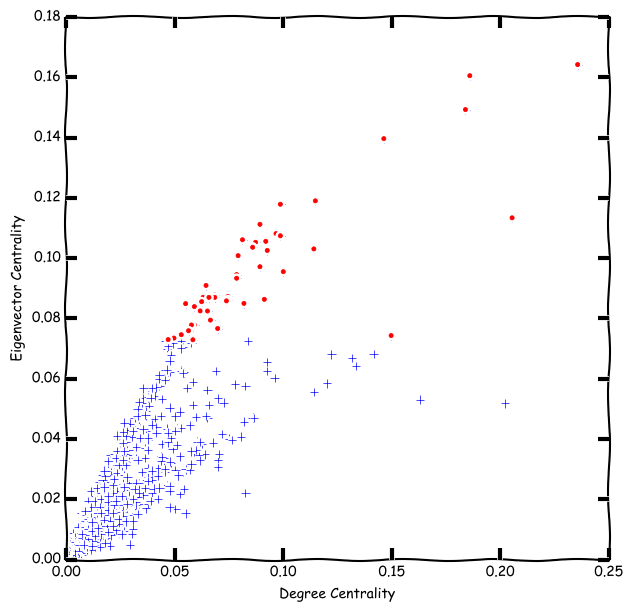

In [10]:
#eigenvector
ev = nx.eigenvector_centrality(G_nw)

# Plot degree-eigenvector 
xdata = dc.values()
ydata = ev.values()
plt.figure(1, figsize=(7,7))
plt.plot(xdata,ydata, '+')
plt.xlabel('Degree Centrality')
plt.ylabel('Eigenvector Centrality')

#centralities sort and dictionaries reverse
ev_sort = ev.values()
ev_sort.sort(reverse = True)

dc_rev = dict((v,k) for k,v in dc.iteritems())
ev_rev = dict((v,k) for k,v in ev.iteritems())

#number of vertices with the highest degree
N_hd = 50

ev_nodes = [ev_rev[x] for x in ev_sort[:N_hd]]
dc_data = [dc[x] for x in ev_nodes]
ev_data = [ev[x] for x in ev_nodes]

plt.plot(dc_data, ev_data, '.')

We can see the positive correlation (especially at high centralities) and consequently if node has high degree then it generally has a strong influence.

3) Local load centrality

The load centrality of a node is the fraction of all shortest paths that pass through that node (Load centrality is slightly different than betweenness). 


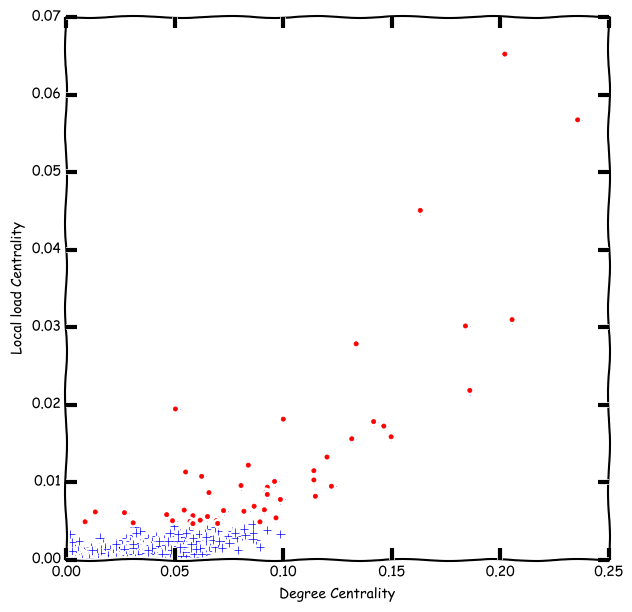

In [11]:
#local load
ld = nx.load_centrality(G_nw)

# Plot degree-local load 
xdata = dc.values()
ydata = ld.values()
plt.figure(1, figsize=(7,7))
plt.plot(xdata,ydata, '+')
plt.xlabel('Degree Centrality')
plt.ylabel('Local load Centrality')

#centralities sort and dictionaries reverse
ld_sort = ld.values()
ld_sort.sort(reverse = True)

ld_rev = dict((v,k) for k,v in ld.iteritems())

#number of vertices with the highest degree
N_hd = 50

ld_nodes = [ld_rev[x] for x in ld_sort[:N_hd]]
dc_data = [dc[x] for x in ld_nodes]
ld_data = [ld[x] for x in ld_nodes]

plt.plot(dc_data, ld_data, '.')

We can see positive correlation and consequently if node has high degree then a large number of shortest paths that generally pass through that node.

4) Dispersion centrality

We haven't dispersion centrality, but we have dispersion between nodes. A link between two nodes (u and v) has a high dispersion when their mutual ties (s and t) are not well connected with each other. Let's take that dispersion centrality of nodes - sum of it dispersions.

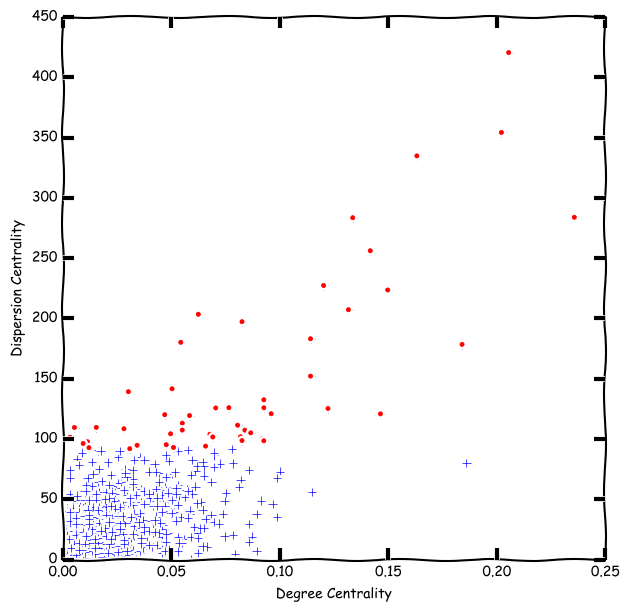

In [12]:
#dispersion
def dispersion_centrality(G):

    nodes = G.nodes()
    n = len(nodes)
    ds = dict((node,0) for node in nodes)
    
    for i in xrange(n-1):
        n1 = nodes[i]
        for j in xrange(i+1,n):
            n2 = nodes[j]
            disp = nx.dispersion(G,n1,n2)
            ds[n1] += disp
            ds[n2] += disp
            
    return ds

ds = dispersion_centrality(G_nw)

# Plot degree-dispersion
xdata = dc.values()
ydata = ds.values()
plt.figure(1, figsize=(7,7))
plt.plot(xdata,ydata, '+')
plt.xlabel('Degree Centrality')
plt.ylabel('Dispersion Centrality')

#centralities sort and dictionaries reverse
ds_sort = ds.values()
ds_sort.sort(reverse = True)

ds_rev = dict((v,k) for k,v in ds.iteritems())

#number of vertices with the highest degree
N_hd = 50

ds_nodes = [ds_rev[x] for x in ds_sort[:N_hd]]
dc_data = [dc[x] for x in ds_nodes]
ds_data = [ds[x] for x in ds_nodes]

plt.plot(dc_data, ds_data, '.')

We can nearly positive correlation when node has high centrality.

4) Katz centrality

Katz centrality computes the centrality for a node based on the centrality of its neighbors. It is a generalization of the eigenvector centrality. The Katz centrality for node i is: 
$$x_i = \alpha \sum_{j} A_{ij} x_j + \beta$$
The parameter $\beta$ controls the initial centrality and

$$\alpha < \frac{1}{\lambda_{max}}$$

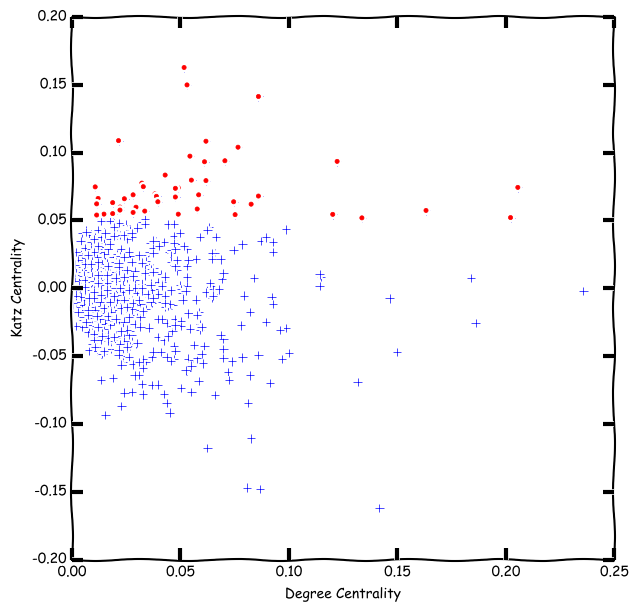

In [13]:
#Katz centrality
kz = nx.katz_centrality_numpy(G_nw)

# Plot degree-Katz
xdata = dc.values()
ydata = kz.values()
plt.figure(1, figsize=(7,7))
plt.plot(xdata,ydata, '+')
plt.xlabel('Degree Centrality')
plt.ylabel('Katz Centrality')

#centralities sort and dictionaries reverse
kz_sort = kz.values()
kz_sort.sort(reverse = True)

kz_rev = dict((v,k) for k,v in kz.iteritems())

#number of vertices with the highest degree
N_hd = 50

kz_nodes = [kz_rev[x] for x in kz_sort[:N_hd]]
dc_data = [dc[x] for x in kz_nodes]
kz_data = [kz[x] for x in kz_nodes]

plt.plot(dc_data, kz_data, '.')

We can not see any relationsheep between Katz and Degree centralities. So node with high degree can have high centrality of its neighbors or not.

### 4. Try to model the network from (3) with Small World Model and Erdos-Renyi Model.

In [14]:
N_nodes = G_nw.number_of_nodes()
N_edges = G_nw.number_of_edges()

In [15]:
# Erdos-Renyi Model
def randgr (n, p):
    G = nx.Graph()
    G.add_nodes_from(range(0,n))
    for i in xrange(0,n-1):
        for j in xrange(i+1,n):
            if rnd.random() <= p:
                G.add_edge(i,j)        
    return G

#edge probability = edges number/ max edges number
p_edg = N_edges/(N_nodes*(N_nodes-1)/2.)


print 'Erdos-Renyi model parameters'
print 'nodes number:', N_nodes
print 'edge probability:', p_edg
print 'p*n=', N_nodes*p_edg

ER_G_nw = randgr (N_nodes, p_edg)

Erdos-Renyi model parameters
nodes number: 1490
edge probability: 0.0150706974187
p*n= 22.4553391538


For Small World model (Watts–Strogatz actually) find rewind probability from the clustering coefficient $C$ and number of neighboors $k$. Let use formula below (A. Barrat, M. Weigt. On the properties of small-world networks. The European Physical Journal B 13, 547–560 (2000)):

$$ C\approx \frac{3(k-2)}{4(k-1)} (1-p)^3 \;\; as \;\; N \to \inf $$

So

$$p =1 - \sqrt[3]{C \frac{4(k-1)}{3(k-2)}} $$

Number of neighboors for Small World model:

$$k = 2 \frac{\text{Number if edges}}{\text{Number of nodes}}$$

In [16]:
#Small World Model

#neighboors number in regular lattice
k_neighboors = 2*N_edges/N_nodes

#network clustering coefficient
CC = nx.transitivity(G_nw)

#rewind probability
p_rew = 1 - (CC*(4*(k_neighboors-1))/(3*(k_neighboors-2)))**(1./3)

lattice_G_nw = gen_regular_graph(N_nodes, k_neighboors)
SW_G_nw = rewind(lattice_G_nw, p_rew)

print 'Small World model parameters'
print 'nodes number:', N_nodes
print 'network clustering coefficient:', CC
print 'model clustering coefficient:', nx.transitivity(SW_G_nw)
print 'neighboors number in regular lattice:', k_neighboors
print 'rewind probability:', p_rew

Small World model parameters
nodes number: 1490
network clustering coefficient: 0.225958517359
model clustering coefficient: 0.233096536851
neighboors number in regular lattice: 22
rewind probability: 0.318625958615


### 5. Plot the dependencies between different centrality metrics for the network and the simultaed graphs. Are there any correlations between centrality metrics? Explain the differences.

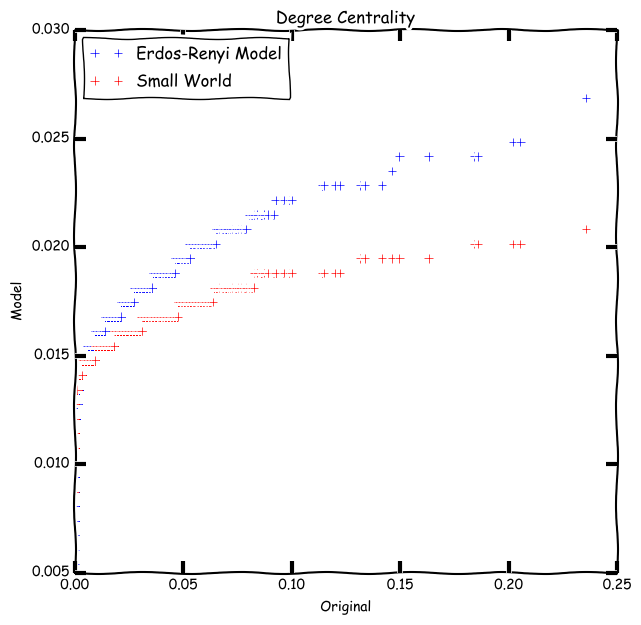

In [17]:
#Degree Centrality
xdata = sorted(dc.values())
ydata1 = sorted(nx.degree_centrality(ER_G_nw).values())
ydata2 = sorted(nx.degree_centrality(SW_G_nw).values())
plt.figure(1, figsize=(7,7))
plt.plot(xdata,ydata1, '+')
plt.plot(xdata,ydata2, '+')
plt.legend(['Erdos-Renyi Model', 'Small World'], loc='upper left')
plt.title('Degree Centrality')
plt.xlabel('Original')
plt.ylabel('Model')

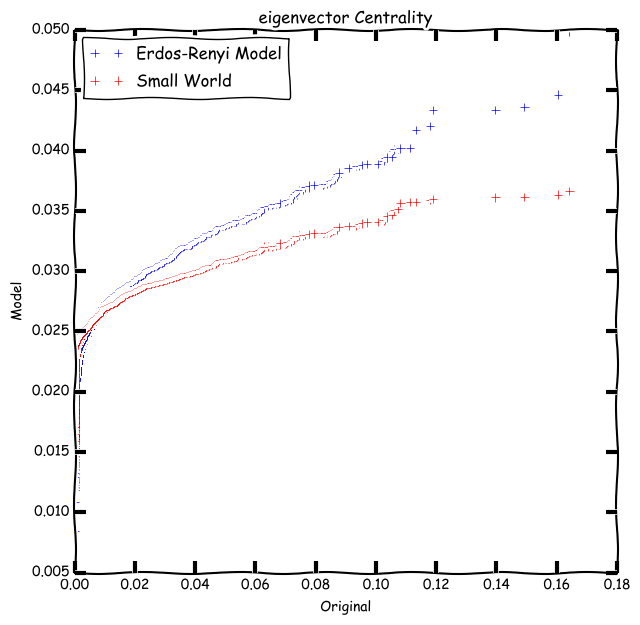

In [18]:
#eigenvector
xdata = sorted(ev.values())
ydata1 = sorted(nx.eigenvector_centrality(ER_G_nw).values())
ydata2 = sorted(nx.eigenvector_centrality(SW_G_nw).values())
plt.figure(1, figsize=(7,7))
plt.plot(xdata,ydata1, '+')
plt.plot(xdata,ydata2, '+')
plt.legend(['Erdos-Renyi Model', 'Small World'], loc='upper left')
plt.title('eigenvector Centrality')
plt.xlabel('Original')
plt.ylabel('Model')

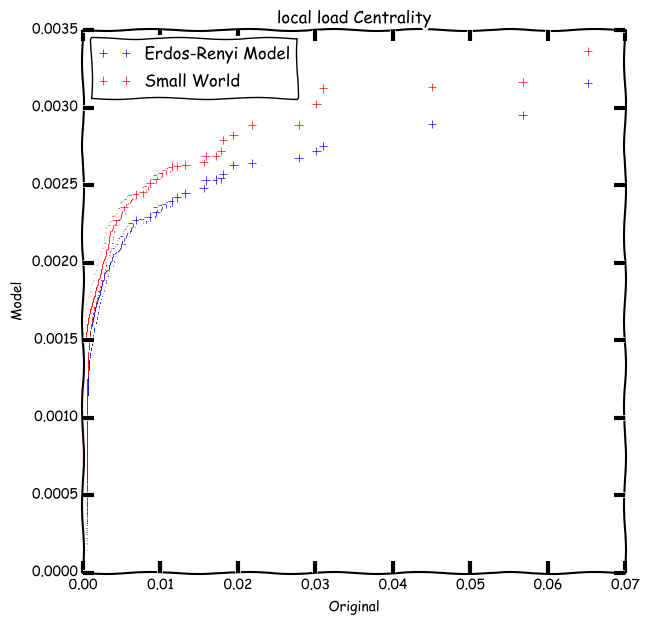

In [19]:
#local load centrality
xdata = sorted(ld.values())
ydata1 = sorted(nx.load_centrality(ER_G_nw).values())
ydata2 = sorted(nx.load_centrality(SW_G_nw).values())
plt.figure(1, figsize=(7,7))
plt.plot(xdata,ydata1, '+')
plt.plot(xdata,ydata2, '+')
plt.legend(['Erdos-Renyi Model', 'Small World'], loc='upper left')
plt.title('local load Centrality')
plt.xlabel('Original')
plt.ylabel('Model')

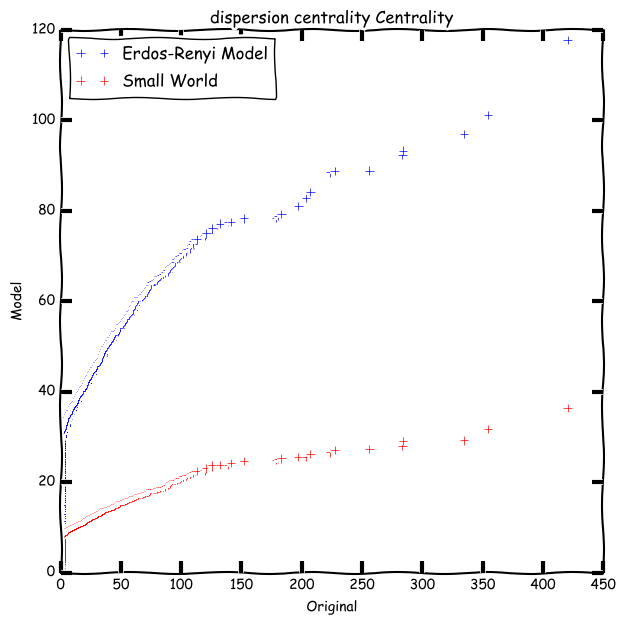

In [20]:
#dispersion centrality
xdata = sorted(ds.values())
ydata1 = sorted(dispersion_centrality(ER_G_nw).values())
ydata2 = sorted(dispersion_centrality(SW_G_nw).values())
plt.figure(1, figsize=(7,7))
plt.plot(xdata,ydata1, '+')
plt.plot(xdata,ydata2, '+')
plt.legend(['Erdos-Renyi Model', 'Small World'], loc='upper left')
plt.title('dispersion centrality Centrality')
plt.xlabel('Original')
plt.ylabel('Model')

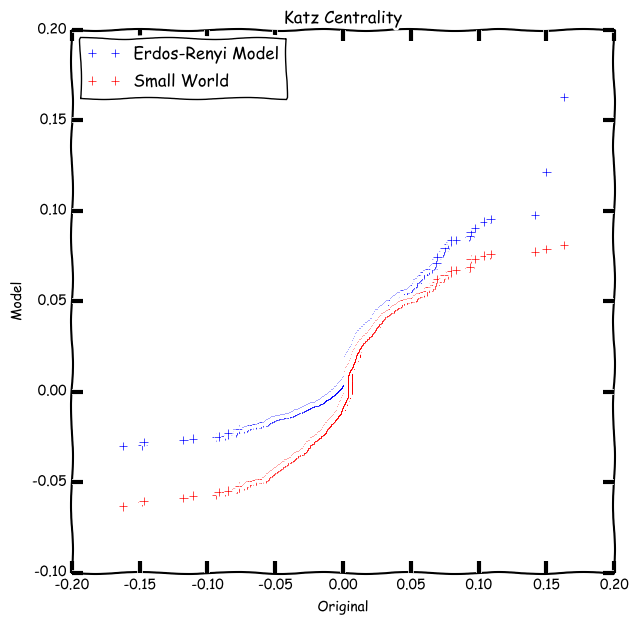

In [21]:
#Katz
xdata = sorted(kz.values())
ydata1 = sorted(nx.katz_centrality_numpy(ER_G_nw).values())
ydata2 = sorted(nx.katz_centrality_numpy(SW_G_nw).values())
plt.figure(1, figsize=(7,7))
plt.plot(xdata,ydata1, '+')
plt.plot(xdata,ydata2, '+')
plt.legend(['Erdos-Renyi Model', 'Small World'], loc='upper left')
plt.title('Katz Centrality')
plt.xlabel('Original')
plt.ylabel('Model')

We can see the nice positive correlation in both models. Among the differences we can list:

1.ER models do not have two important properties observed in many real-world networks:

- They do not generate local clustering and triadic closures. Instead because they have a constant, random, and independent probability of two nodes being connected, ER graphs have a low clustering coefficient (CC).

- They do not account for the formation of hubs. Formally, the degree distribution of ER graphs converges to a Poisson distribution, rather than a power law observed in many real-world, scale-free networks.

Information from: Ravasz,E.; Somera,A. L.; Mongru,D.A.; Oltvai,Z.N.; Barabasi,A.L. (2002). "Hierarchical Organization of Modularity in Metabolic Networks". SCIENCE. 297/30: 1551–1555.

2.The major limitation of the Small World model is that it produces an unrealistic degree distribution. 

Information from: https://en.wikipedia.org/wiki/Watts_and_Strogatz_model

Indeed:

1.We can see the difference between Network CC and Erdos-Renyi Model CC;

2.We can see that the degree distribution in Network like a Power Law whereas the degree distribution in ER and SW models is Poisson distribution

In [22]:
print 'network clustering coefficient:', CC
print 'Erdos-Renyi Model clustering coefficient:', nx.transitivity(ER_G_nw)

network clustering coefficient: 0.225958517359
Erdos-Renyi Model clustering coefficient: 0.0149690477414


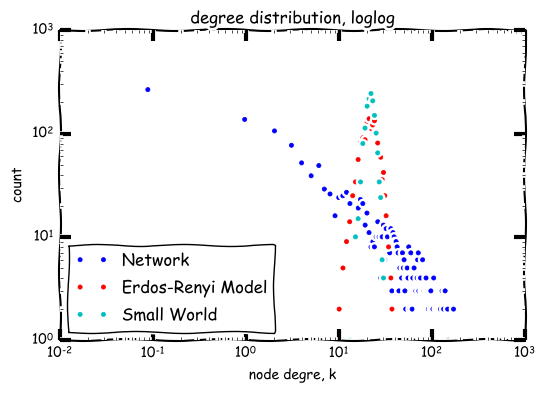

In [29]:
#degree distribution
yh_G, binEdges1=np.histogram(G_nw.degree().values(), bins=2000)
yh_ER, binEdges2=np.histogram(ER_G_nw.degree().values(), bins=2000)
yh_SW, binEdges3=np.histogram(SW_G_nw.degree().values(), bins=2000)
bincenters1 = 0.5*(binEdges1[1:]+binEdges1[:-1])
bincenters2 = 0.5*(binEdges2[1:]+binEdges2[:-1])
bincenters3 = 0.5*(binEdges3[1:]+binEdges3[:-1])
plt.loglog(bincenters1, yh_G, '.', lw=2)
plt.loglog(bincenters2, yh_ER, '.', lw=2)
plt.loglog(bincenters3, yh_SW, '.', lw=2)
plt.ylabel('count')
plt.xlabel('node degre, k')
plt.legend(['Network','Erdos-Renyi Model', 'Small World'], loc='lower left')
plt.title('degree distribution, loglog')